In [216]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import mplcursors
pd.set_option('display.max_columns', None)

In [217]:
playoff_data_DF = pd.read_excel('Playoff DataFrame.xlsx')
playoff_data_DF.rename(columns={'Unnamed: 0': 'Player Name'}, inplace = True)
# We add the column 'graph_info' so that we can make changes to it while not changing 'Player Name'
playoff_data_DF['Player Name (Graph Info)'] = playoff_data_DF['Player Name']
playoff_data_DF

,Player Name,Playoff Games Played,Playoff Points Scored,Player Name (Graph Info)
0,Alaa Abdelnaby,17,38,Alaa Abdelnaby
1,Zaid Abdul-Aziz,18,92,Zaid Abdul-Aziz
2,Kareem Abdul-Jabbar,237,5762,Kareem Abdul-Jabbar
3,Mahmoud Abdul-Rauf,15,195,Mahmoud Abdul-Rauf
4,Tariq Abdul-Wahad,13,68,Tariq Abdul-Wahad
...,...,...,...,...
2723,Wang Zhi-zhi,16,30,Wang Zhi-zhi
2724,Paul Zipser,6,44,Paul Zipser
2725,Ante Zizic,8,13,Ante Zizic
2726,Ivica Zubac,21,155,Ivica Zubac


In [218]:
"""
All of the code in this cell is used to make the 'caption' more descriptive when you hover the mouse over a
certain point on the graph.

Rather than just saying the name of the player, it also includes their playoff scoring rank as well as their 
total playoff points scored.
"""

# Making our Playoff Points Scored column from the DataFrame into a list titled 'pts'
pts = playoff_data_DF['Playoff Points Scored'].tolist()

# Ranking the top scorers (while maintaining the indexes of list 'pts') to a new list titled 'rank_list'
rank_pts = [1] * len(pts)
for i, x in enumerate(sorted(range(len(pts)), key=lambda y: pts[y])):
    rank_pts[x] = i

scoring_rank = [abs(len(rank_pts) - i) for i in rank_pts]

# Adding each players scoring rank and total points to their 'Player Name' column in our DataFrame so that 
# they will show up when we hover our mouse over the scatter plot
ct = 0

for i in playoff_data_DF.index:
    
    playoff_data_DF.loc[i, 'Player Name (Graph Info)'] = str(newl[ct]) + '. ' + playoff_data_DF.loc[i]['Player Name (Graph Info)'] + ' - ' + playoff_data_DF.loc[i]['Playoff Points Scored'].astype(str) + ' pts'
    
    ct += 1

# Reset index
playoff_data_DF.reset_index(drop=True, inplace = True)

<IPython.core.display.Javascript object>


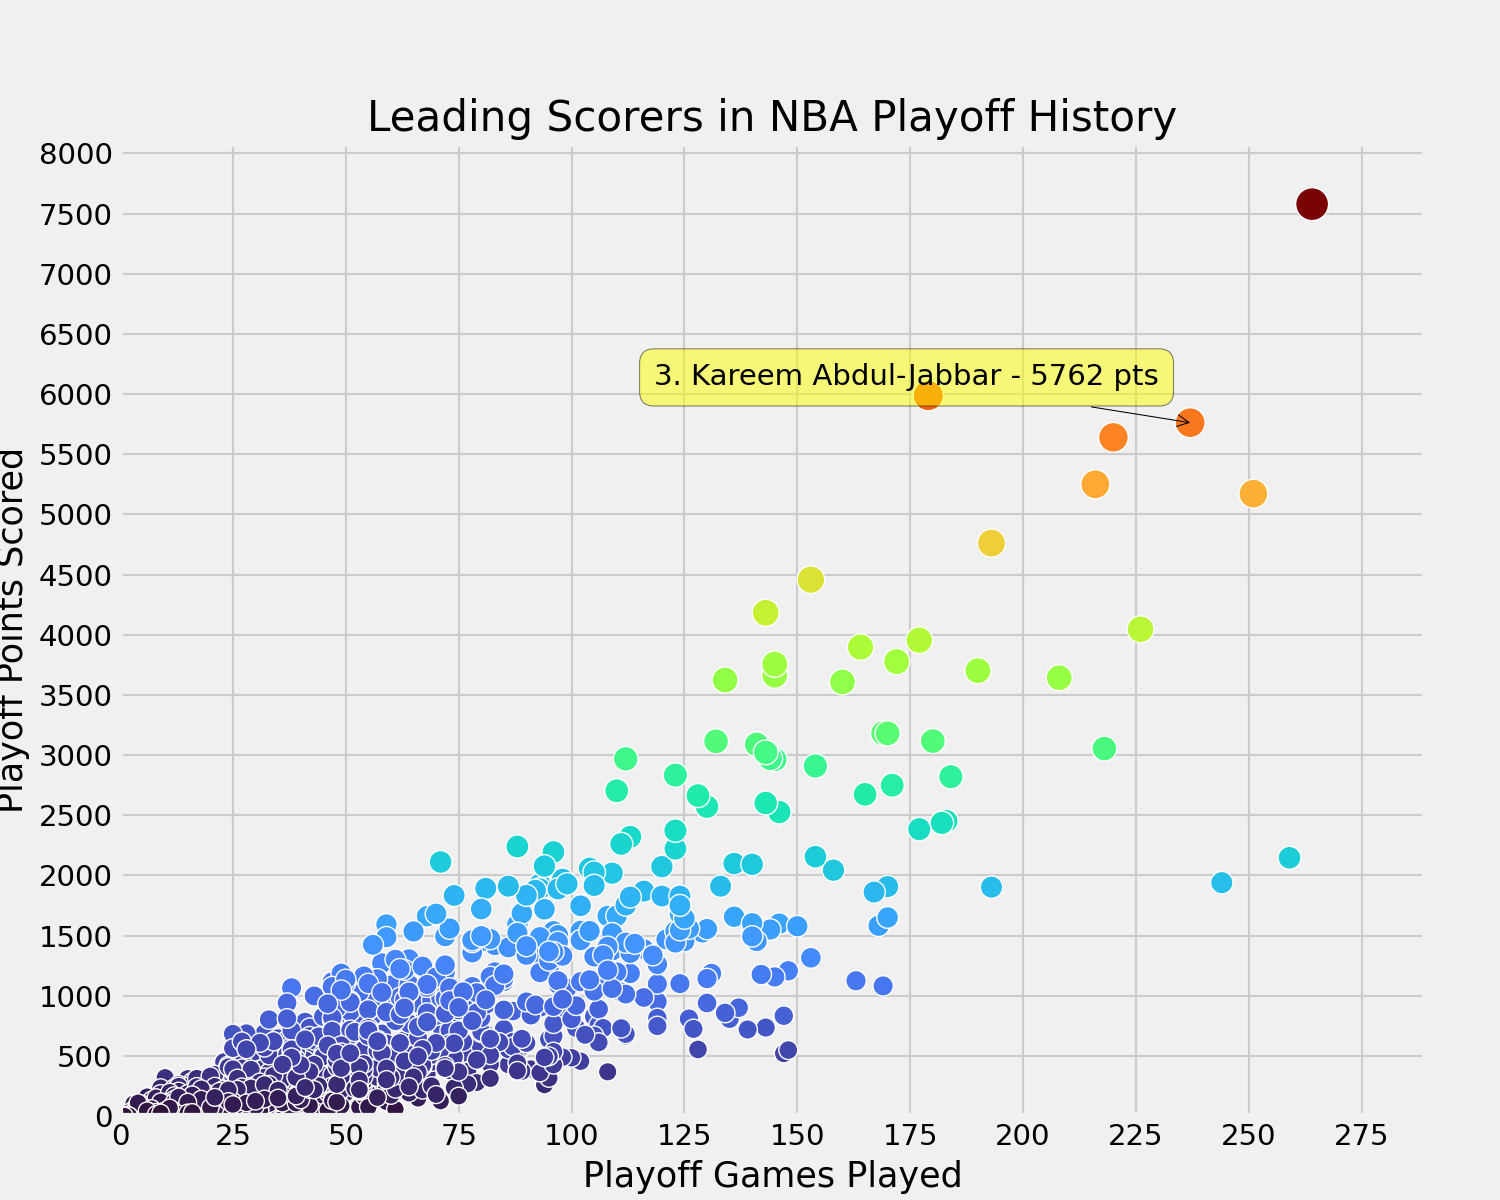

In [219]:
# Magic command to create a live interactive graph (below) 
# This also allows us to zoom in on various subsets of our graph and get a much closer look at each individual
# point as their are almost 3k many of which are stacked on top of each other
%matplotlib notebook

# Styling scatter plot
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 8))

sns.scatterplot(
    data = playoff_data_DF, x = 'Playoff Games Played', y = 'Playoff Points Scored', hue = 'Playoff Points Scored',
    palette = 'turbo', size = 'Playoff Points Scored', sizes = (70, 250), legend = False)

plt.xticks(np.arange(0, playoff_data_DF['Playoff Games Played'].max() + 50, 25))
plt.yticks(np.arange(0, playoff_data_DF['Playoff Points Scored'].max() + 500, 500))
plt.title('Leading Scorers in NBA Playoff History')

plt.xlim(0, playoff_data_DF['Playoff Games Played'].max() + 25)
plt.ylim(0, playoff_data_DF['Playoff Points Scored'].max() + 500)

"""
I found the following lambda function online and modified it to show the index value when you hover over a
point rather than the x,y coordinates.  This way, whenever you hover over a point in the live graph below it will
tell you which player that point represents.
"""

mplcursors.cursor().connect(
    "add", lambda sel: sel.annotation.set_text(playoff_data_DF['Player Name (Graph Info)'][sel.target.index]))

plt.show()

In [220]:
playoff_data_DF

,Player Name,Playoff Games Played,Playoff Points Scored,Player Name (Graph Info)
0,Alaa Abdelnaby,17,38,1672. Alaa Abdelnaby - 38 pts
1,Zaid Abdul-Aziz,18,92,1285. Zaid Abdul-Aziz - 92 pts
2,Kareem Abdul-Jabbar,237,5762,3. Kareem Abdul-Jabbar - 5762 pts
3,Mahmoud Abdul-Rauf,15,195,925. Mahmoud Abdul-Rauf - 195 pts
4,Tariq Abdul-Wahad,13,68,1423. Tariq Abdul-Wahad - 68 pts
...,...,...,...,...
2723,Wang Zhi-zhi,16,30,1745. Wang Zhi-zhi - 30 pts
2724,Paul Zipser,6,44,1596. Paul Zipser - 44 pts
2725,Ante Zizic,8,13,2009. Ante Zizic - 13 pts
2726,Ivica Zubac,21,155,1052. Ivica Zubac - 155 pts
